# Modelagem de tópicos
### corpus: teses e dissertações 2015

## Bibliotecas utilizadas

In [1]:
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords

import nltk
from nltk.probability import FreqDist

import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#TRANSFORMAR SIGLAS POPULARES EM PALAVRAS

def conversao_termos(texto):
    texto = re.sub(" museus "," museu ",texto.lower())
    texto = re.sub(" abc "," academia brasileira de ciência ",texto.lower())
    texto = re.sub(" ai "," arquitetura da informação ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" american society for information science and Technology "," asist ",texto.lower())
    texto = re.sub(" annual review of information science and technology "," arist ",texto.lower())
    texto = re.sub(" aoi "," arquitetura e organização da informação ",texto.lower())
    texto = re.sub(" associação brasileira de educação em ciência da informação "," abecin ",texto.lower())
    texto = re.sub(" associação brasileira de ensino de biblioteconomia e documentação "," abebd ",texto.lower())
    texto = re.sub(" associação brasileira de normas técnicas "," abnt ",texto.lower())
    texto = re.sub(" associação nacional de pesquisa e pós-graduação em ciência da informação "," ancib ",texto.lower())
    texto = re.sub(" base de dados referencial de artigos de periódicos em ciência da informação "," brapci ",texto.lower())
    texto = re.sub(" bci "," biblioteconomia e ciência da informação ",texto.lower())
    texto = re.sub(" biblioteca digital de teses e dissertações "," bdtd ",texto.lower())
    texto = re.sub(" bn "," biblioteca nacional ",texto.lower())
    texto = re.sub(" bu "," biblioteca universitária ",texto.lower())
    texto = re.sub(" c&t "," ciência e tecnologia ",texto.lower())
    texto = re.sub(" cc "," ciência da computação ",texto.lower())
    texto = re.sub(" ccn "," catálogo coletivo nacional ",texto.lower())
    texto = re.sub(" cdd "," classificação decimal de dewey ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" ci "," ciência da informação ",texto.lower())
    texto = re.sub(" ci:"," ciência da informação ",texto.lower()) 
    texto = re.sub(" ci,"," ciência da informação ",texto.lower())
    texto = re.sub(" cms "," content management system ",texto.lower())
    texto = re.sub(" cne "," conselho nacional de educação ",texto.lower())
    texto = re.sub(" conselho nacional de desenvolvimento científico e tecnológico "," cnpq ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" crm "," customer relationship management ",texto.lower())
    texto = re.sub(" dc "," dublin core ",texto.lower())
    texto = re.sub(" descriptive ontology for linguistic and cognitive engineering "," dolce ",texto.lower())
    texto = re.sub(" ead "," educação à distância ",texto.lower())
    texto = re.sub(" eci "," escola de ciência da informação ",texto.lower())
    texto = re.sub(" enade "," exame nacional de desempenho ",texto.lower())
    texto = re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",texto.lower())
    texto = re.sub(" fgv "," Fundação Getúlio Vargas ",texto.lower())
    texto = re.sub(" fiocruz "," fundação oswaldo cruz ",texto.lower())
    texto = re.sub(" ftp "," file transfer protocol ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de minas gerais "," fapemig ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de são paulo "," fapesp ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo do rio de janeiro "," faperj ",texto.lower())
    texto = re.sub(" fundação de amparo às pesquisas "," faps ",texto.lower())
    texto = re.sub(" gic "," gestão da informação e conhecimento ",str(texto.lower()))
    texto = re.sub(" gic "," gestão da informação e do conhecimento ",texto.lower())
    texto = re.sub(" gpl "," general public licence ",texto.lower())
    texto = re.sub(" hypertext markup language limguagem "," html ",texto.lower())
    texto = re.sub(" ia "," inteligência artificial ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ics "," informação cultura e sociedade ",texto.lower())
    texto = re.sub(" ict "," informação, ciência e tecnologia ",texto.lower())
    texto = re.sub(" idh "," índice de desenvolvimento humano ",texto.lower())
    texto = re.sub(" ies "," instituição de ensino superior ",texto.lower())
    texto = re.sub(" information science and technology abstracts "," ista ",texto.lower())
    texto = re.sub(" instituto brasileiro de bibliografia e documentação "," ibbd ",texto.lower())
    texto = re.sub(" instituto brasileiro de geografia e estatística "," ibge ",texto.lower())
    texto = re.sub(" instituto brasileiro de informação em ciência e tecnologia "," ibict ",texto.lower())
    texto = re.sub(" instituto de ciência da informação "," ici ",texto.lower())
    texto = re.sub(" instituto nacional de estudos e pesquisas educacionais anísio teixeira "," inep ",texto.lower())
    texto = re.sub(" instituto universitário de pesquisa do rio de janeiro "," iuoerj ",texto.lower())
    texto = re.sub(" international federation of library associations and institutions "," ifla ",texto.lower())
    texto = re.sub(" international standard book number "," isbn ",texto.lower())
    texto = re.sub(" international standard serial number "," issn ",texto.lower())
    texto = re.sub(" isi "," institute for scientific information ",texto.lower())
    texto = re.sub(" iso "," international organization for standardization ",texto.lower())
    texto = re.sub(" it "," informação e tecnologia ",texto.lower())
    texto = re.sub(" jcr "," journal citation reports ",texto.lower())
    texto = re.sub(" jstor "," journal storage ",texto.lower())
    texto = re.sub(" kos "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" lc "," linguagem cinzenta ",texto.lower())
    texto = re.sub(" ld "," linguagem documentária ",texto.lower())
    texto = re.sub(" ldb "," lei de diretrizes e bases ",texto.lower())
    texto = re.sub(" library and informations science abstracts "," lisa ",texto.lower())
    texto = re.sub(" ln "," linguagem natural ",texto.lower())
    texto = re.sub(" lod "," linked open data ",texto.lower())
    texto = re.sub(" marc "," machine readable cataloging ",texto.lower())
    texto = re.sub(" mdi "," multiple document interface ",texto.lower())
    texto = re.sub(" mec "," ministério da educação ",texto.lower())
    texto = re.sub(" npd "," núcleo de pesquisa e documentação ",texto.lower())
    texto = re.sub(" oai "," open archives iniciative ",texto.lower())
    texto = re.sub(" oc "," organização do conhecimento ",texto.lower())
    texto = re.sub(" ocr "," optical character recognition ",texto.lower())
    texto = re.sub(" oi "," organização da informação ",texto.lower())
    texto = re.sub(" ojs "," open journal systems ",texto.lower())
    texto = re.sub(" ong "," organização não-governamental ",texto.lower())
    texto = re.sub(" onu "," organização das nações unidas ",texto.lower())
    texto = re.sub(" organização das nações unidas para a educação e cultura "," unesco ",texto.lower())
    texto = re.sub(" osi "," open society institute ",texto.lower())
    texto = re.sub(" oui "," organização e uso da informação ",texto.lower())
    texto = re.sub(" owl "," web ontology language ",texto.lower())
    texto = re.sub(" pln "," processamento de linguagem natural ",texto.lower())
    texto = re.sub(" plos "," public library of science ",texto.lower())
    texto = re.sub(" poi "," produção e organização da informação ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de minas gerais "," puc mg ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de são paulo "," puc sp ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio de janeiro "," puc rj ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio grande do sul "," puc rs ",texto.lower())
    texto = re.sub(" ppg "," programa de pós-graduação ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciência da informação "," ppgci ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciências sociais "," ppgcs ",texto.lower())
    texto = re.sub(" programa de pós-graduação em sociologia "," ppgs ",texto.lower())
    texto = re.sub(" rc "," representação do conhecimento ",texto.lower())
    texto = re.sub(" rdf "," resource description framework ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" sad "," sistema de apoio à decisão ",texto.lower())
    texto = re.sub(" sci "," science citation index ",texto.lower())
    texto = re.sub(" scientific electronic library online "," scielo",texto.lower())
    texto = re.sub(" sdr "," zona de desenvolvimento real ",texto.lower())
    texto = re.sub(" serviço central de informação bibliográfica "," scib ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem comercial "," senac ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem industrial "," senai ",texto.lower())
    texto = re.sub(" serviço social da indústria "," sesi ",texto.lower())
    texto = re.sub(" serviço social do comércio "," sesc ",texto.lower())
    texto = re.sub(" sesi "," serviço social da indústria ",texto.lower())
    texto = re.sub(" sibi "," sistema integrado de bibliotecas ",texto.lower())
    texto = re.sub(" sig "," sistema de informação gerencial ",texto.lower())
    texto = re.sub(" snad "," secretária nacional de políticas anti-drogas ",texto.lower())
    texto = re.sub(" snpq "," sistema nacional de pós-graduação",texto.lower())
    texto = re.sub(" soc "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" sri "," sistema de recuperação da informação ",texto.lower())
    texto = re.sub(" ssd "," sistema de suporte à decisão ",texto.lower())
    texto = re.sub(" tcc "," trabalho de conclusão de curso ",texto.lower())
    texto = re.sub(" universidade federal de minas gerais "," ufmg ",texto.lower())
    texto = re.sub(" universidade federal de ouro preto "," ufop ",texto.lower())
    texto = re.sub(" universidade federal de pernambuco "," ufpe ",texto.lower())
    texto = re.sub(" universidade federal de santa caratina "," ufsc ",texto.lower())
    texto = re.sub(" universidade federal de são carlos "," ufscar ",texto.lower())
    texto = re.sub(" universidade federal de sergipe "," ufs ",texto.lower())
    texto = re.sub(" universidade federal de viçosa "," ufv ",texto.lower())
    texto = re.sub(" universidade federal do ceará "," ufc ",texto.lower())
    texto = re.sub(" universidade federal do estado do rio de janeiro "," unirio ",texto.lower())
    texto = re.sub(" universidade federal do maranhão "," ufma ",texto.lower())
    texto = re.sub(" universidade federal do pará "," ufpa ",texto.lower())
    texto = re.sub(" universidade federal do paraná "," ufpr ",texto.lower())
    texto = re.sub(" universidade federal do rio de janeiro "," ufrj ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do norte "," ufrn ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do sul  "," ufrgs ",texto.lower())
    texto = re.sub(" universidade federal fluminense "," uff ",texto.lower())
    texto = re.sub(" universidade federal rural do rio de janeiro "," ufrrj ",texto.lower())
    texto = re.sub(" uri "," uniform resource identifier ",texto.lower())
    texto = re.sub(" world wide web consortium "," w3c ",texto.lower())
    texto = re.sub(" xml "," extensible markup language ",texto.lower())
    texto = re.sub(" zpd "," zona de desenvolvimento proximal ",texto.lower())
    texto = re.sub(" citações "," citação ",texto.lower())
    texto = re.sub(" links "," link ",texto.lower())
   #texto = re.sub(" museus "," museu ",texto.lower())
    texto = re.sub("museus","museu",texto.lower())
    texto = re.sub(" literacy "," alfabetização ",texto.lower())  
    texto = re.sub(" bibliotecas "," biblioteca ",texto.lower())
    texto = re.sub(" informações "," informação ",texto.lower())
    texto = re.sub(" information "," informação ",texto.lower())
    texto = re.sub(" bibliographia "," bibliografia ",texto.lower())
    texto = re.sub(" termos "," termo ",texto.lower())
    texto = re.sub(" knowledge "," conhecimento ",texto.lower())  
    texto = re.sub(" accessibility "," acessibilidade ",texto.lower())  
    texto = re.sub(" research "," pesquisa ",texto.lower()) 
    texto = re.sub(" image "," imagem ",texto.lower()) 
    texto = re.sub(" archivists "," arquivistas ",texto.lower()) 
    texto = re.sub("-se", "", texto.lower())
    texto = re.sub(" se ", "", texto.lower())
    texto = re.sub("-lo ", "", texto.lower())
    texto = re.sub("-la ", "", texto.lower())
    texto = re.sub(" lo ", "", texto.lower())
    texto = re.sub(" la ", "", texto.lower())
    texto = re.sub(" los ", "", texto.lower())
    texto = re.sub(" las ", "", texto.lower())
    return texto

In [3]:
#CONFIGURANDO STOP_WORDS

stop_words = set(stopwords.words('portuguese'))
stop_words_us =  set(stopwords.words('english'))
stop_words_us =  set(stopwords.words('spanish'))

#ADICIONAR INSERÇÕES DE PALAVRAS DE PARADA
new_stopwords = ['tais','xviii','jan.',' jul.',' jan ','and','the','acho','lo','pra','é','onde','senão','quanto','outros','sobre','sobretudo','ser','ainda','quais','desse','assim','tal','através','podemos','portanto','pode','tanto','alguns','possível','p.','v','p','-se','se',' se','nesse','nessa','neste','nesta','http','https','disponível','acesso','sendo','marília','rio','dessa','diz','respeito','finais','considerações','desta','belo horizointe','janeiro','fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro','porto alegre','outro','xix','londrina','paulista','xvii','sentido','maior','bem','ter','deve','devem','entretanto','fazer','todo','tipo','exemplo','pois','apenas','utilizado','utilizados','acordo','casa','figura','cada','tese','acesso','partir','parte','segundo','autor','outras','podem','vez','todos','então','sim','todas','apresenta','algumas','outra','lo','la','-lo','-la','porque','por que','os','etc','jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez','então','aqui','enancib']


stop_words.update(new_stopwords)
stop_words.update(stop_words_us)
new_stopwords_list = set(stop_words)

In [4]:
#SETAR DOCUMENTO A SER LIDO

#CAMINHO DO ARQUIVO
data = []
pasta = "corpus_tesesdissertacoes_2015"
caminho="" + pasta

arquivo = open(caminho + ".txt", "r",encoding="utf-8")

In [5]:
#LEITURA DO CORPUS

x=0
for fileid in arquivo:
    document = fileid
    document = conversao_termos(document)

#    document=re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",str(document.lower()))
    data.append(document)

NO_DOCUMENTS = len(data)
print(NO_DOCUMENTS)

315


In [6]:
#RESULTADO PARA VERIFICAÇÃO DE CONVERSÃO DE SIGLAS E LEITURA DE TEXTO CONTIDO NO CORPUS

print(data[1])

['   universidade de brasília faculdade de ciência da informação ppgci     alcimar sanches rangel   transparência versus segurança da informação: uma análise dos fatores de risco exposto na comunicação entre o governo e a sociedade.               brasília -df 2015     universidade de brasília faculdade de ciência da informação ppgci     alcimar sanches rangel   transparência versus segurança da informação: uma análise dos fatores de risco exposto na comunicação entre o governo e a sociedade.    dissertação apresentada ao ppgci da universidade de brasília como requisito parcial para obtenção do título de mestre em ciência da informação.  orientador: prof. dr. jorge henrique cabral fernandes    brasília -df 2015             resumo trata o presente trabalho de uma análise dos fatores de risco expostos na comunicação entre o governo e a sociedade, a partir da publicação dos dados de agentes públicos que atuam na segurança nacional e segurança pública federal.  tal análise está inserida na 

In [7]:
#FUNÇÃO BIGRAMA E TRIGRAMA

def bigramas(words):
 
    bigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-1):
            break
        else:
            bigrama_obs = words[i] + '_' + words[i+1]
            bigrams.append(bigrama_obs)
 
    return bigrams

def trigramas(words):
 
    trigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-2):
            break
        else:
            trigrama_obs = words[i] + '_' + words[i+1] + '_' + words[i+2]
            trigrams.append(trigrama_obs)
 
    return trigrams

In [8]:
# TOKENIZAR O DOCUMENTO E FAZER A STOPWORDS

def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in stop_words and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text
 
tokenized_data = []
texto2 = []
total_unigramas = []
total_bigramas = []
total_trigramas = []

for text in data:
    xtexto = clean_text(text)

#CRIAR O UNIGRAMA, BIGRAMAS, TRIGRAMAS
    unigramas = xtexto
    xbigramas = bigramas(xtexto)
    xtrigramas = trigramas(xtexto)
    xunigramas = unigramas + xbigramas + xtrigramas
    
    tokenized_data.append(xunigramas)
    texto2 = texto2 + xunigramas

#CRIAR OPÇÃO PARA MOSTRAR A FREQUENCIA SOMENTE DE UNIGRAMA , BIGRAMAS E TRIGRAMAS
    total_unigramas = total_unigramas + unigramas
    total_bigramas = total_bigramas + xbigramas
    total_trigramas = total_trigramas + xtrigramas
    
xfrequencia = texto2

In [9]:
#TOTAL DE UNIGRAMAS, BIGRAMAS E TRIGRAMAS
print("Total de Unigramas: "+ str((len(total_unigramas))))
print("Total de Bigramas: "+ str((len(total_bigramas))))
print("Total de Trigramas: "+ str((len(total_trigramas))))

Total de Unigramas: 7561807
Total de Bigramas: 7561492
Total de Trigramas: 7561177


In [10]:
#CELULA EXTRA - VERIFICAR TEXTO TOKENIZADO com n-gramas
print(tokenized_data[1])

['universidade', 'brasília', 'faculdade', 'informação', 'ppgci', 'alcimar', 'sanches', 'rangel', 'transparência', 'versus', 'segurança', 'informação', 'fatores', 'risco', 'exposto', 'comunicação', 'governo', 'sociedade', 'brasília', '-df', 'universidade', 'brasília', 'faculdade', 'informação', 'ppgci', 'alcimar', 'sanches', 'rangel', 'transparência', 'versus', 'segurança', 'informação', 'fatores', 'risco', 'exposto', 'comunicação', 'governo', 'sociedade', 'dissertação', 'apresentada', 'ppgci', 'universidade', 'brasília', 'requisito', 'parcial', 'obtenção', 'mestre', 'informação', 'orientador', 'prof.', 'jorge', 'henrique', 'cabral', 'fernandes', 'brasília', '-df', 'resumo', 'trata', 'presente', 'trabalho', 'fatores', 'risco', 'expostos', 'comunicação', 'governo', 'sociedade', 'publicação', 'dados', 'agentes', 'atuam', 'segurança', 'nacional', 'segurança', 'federal', 'inserida', 'perspectiva', 'interdisciplinar', 'informação', 'aborda', 'campos', 'estudo', 'computação', 'direito', 'dese

# CRIANDO A FREQUÊNCIA

In [11]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA GERAL
num_freq = 1000
fdist = FreqDist(xfrequencia)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_geral_tesesdissertacoes_2015"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação': 102184, 'pesquisa': 35136, 'conhecimento': 27656, 'biblioteca': 27265, 'forma': 23373, 'social': 20699, 'processo': 20414, 'dados': 19571, 'relação': 17526, 'trabalho': 17494, 'comunicação': 16716, 'uso': 15521, 'brasil': 15508, 'meio': 14963, 'memória': 14941, 'produção': 14668, 'organização': 14625, 'termo': 14473, 'museu': 14393, 'documentos': 13903, 'desenvolvimento': 13627, 'sociedade': 13165, 'sociais': 13111, 'educação': 12581, 'tempo': 12528, 'pessoas': 12319, 'gestão': 12123, 'sistema': 11891, 'fonte': 11616, 'cultura': 11475, 'paulo': 11165, 'estudo': 11010, 'anos': 10944, 'nacional': 10832, 'universidade': 10662, 'busca': 10543, 'história': 10491, 'contexto': 10336, 'mundo': 10158, 'espaço': 9998, 'grupo': 9981, 'rede': 9980, 'atividades': 9711, 'vida': 9637, 'relações': 9456, 'construção': 9410, 'estudos': 9386, 'grande': 9137, 'caso': 9093, 'científica': 9031, 'formação': 8990, 'quadro': 8983, 'cultural': 8942, 'diferentes': 8899, 'campo': 8850, 'ba


  PALAVRA -- FREQUÊNCIA


[('informação', 102184),
 ('pesquisa', 35136),
 ('conhecimento', 27656),
 ('biblioteca', 27265),
 ('forma', 23373),
 ('social', 20699),
 ('processo', 20414),
 ('dados', 19571),
 ('relação', 17526),
 ('trabalho', 17494),
 ('comunicação', 16716),
 ('uso', 15521),
 ('brasil', 15508),
 ('meio', 14963),
 ('memória', 14941),
 ('produção', 14668),
 ('organização', 14625),
 ('termo', 14473),
 ('museu', 14393),
 ('documentos', 13903),
 ('desenvolvimento', 13627),
 ('sociedade', 13165),
 ('sociais', 13111),
 ('educação', 12581),
 ('tempo', 12528),
 ('pessoas', 12319),
 ('gestão', 12123),
 ('sistema', 11891),
 ('fonte', 11616),
 ('cultura', 11475),
 ('paulo', 11165),
 ('estudo', 11010),
 ('anos', 10944),
 ('nacional', 10832),
 ('universidade', 10662),
 ('busca', 10543),
 ('história', 10491),
 ('contexto', 10336),
 ('mundo', 10158),
 ('espaço', 9998),
 ('grupo', 9981),
 ('rede', 9980),
 ('atividades', 9711),
 ('vida', 9637),
 ('relações', 9456),
 ('construção', 9410),
 ('estudos', 9386),
 ('grande

In [12]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA UNIGRAMA
num_freq = 1000
fdist = FreqDist(total_unigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_unigrama_tesesdissertacoes_2015"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação': 102184, 'pesquisa': 35136, 'conhecimento': 27656, 'biblioteca': 27265, 'forma': 23373, 'social': 20699, 'processo': 20414, 'dados': 19571, 'relação': 17526, 'trabalho': 17494, 'comunicação': 16716, 'uso': 15521, 'brasil': 15508, 'meio': 14963, 'memória': 14941, 'produção': 14668, 'organização': 14625, 'termo': 14473, 'museu': 14393, 'documentos': 13903, 'desenvolvimento': 13627, 'sociedade': 13165, 'sociais': 13111, 'educação': 12581, 'tempo': 12528, 'pessoas': 12319, 'gestão': 12123, 'sistema': 11891, 'fonte': 11616, 'cultura': 11475, 'paulo': 11165, 'estudo': 11010, 'anos': 10944, 'nacional': 10832, 'universidade': 10662, 'busca': 10543, 'história': 10491, 'contexto': 10336, 'mundo': 10158, 'espaço': 9998, 'grupo': 9981, 'rede': 9980, 'atividades': 9711, 'vida': 9637, 'relações': 9456, 'construção': 9410, 'estudos': 9386, 'grande': 9137, 'caso': 9093, 'científica': 9031, 'formação': 8990, 'quadro': 8983, 'cultural': 8942, 'diferentes': 8899, 'campo': 8850, 'ba

[('informação', 102184),
 ('pesquisa', 35136),
 ('conhecimento', 27656),
 ('biblioteca', 27265),
 ('forma', 23373),
 ('social', 20699),
 ('processo', 20414),
 ('dados', 19571),
 ('relação', 17526),
 ('trabalho', 17494),
 ('comunicação', 16716),
 ('uso', 15521),
 ('brasil', 15508),
 ('meio', 14963),
 ('memória', 14941),
 ('produção', 14668),
 ('organização', 14625),
 ('termo', 14473),
 ('museu', 14393),
 ('documentos', 13903),
 ('desenvolvimento', 13627),
 ('sociedade', 13165),
 ('sociais', 13111),
 ('educação', 12581),
 ('tempo', 12528),
 ('pessoas', 12319),
 ('gestão', 12123),
 ('sistema', 11891),
 ('fonte', 11616),
 ('cultura', 11475),
 ('paulo', 11165),
 ('estudo', 11010),
 ('anos', 10944),
 ('nacional', 10832),
 ('universidade', 10662),
 ('busca', 10543),
 ('história', 10491),
 ('contexto', 10336),
 ('mundo', 10158),
 ('espaço', 9998),
 ('grupo', 9981),
 ('rede', 9980),
 ('atividades', 9711),
 ('vida', 9637),
 ('relações', 9456),
 ('construção', 9410),
 ('estudos', 9386),
 ('grande

In [13]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA BIGRAMA
num_freq = 1000
fdist = FreqDist(total_bigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_bigrama_tesesdissertacoes_2015"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'universidade_federal': 3697, 'recuperação_informação': 2703, 'redes_sociais': 2631, 'produção_científica': 2355, 'uso_informação': 2329, 'informação_conhecimento': 2252, 'gestão_informação': 2216, 'muitas_vezes': 1957, 'dados_pesquisa': 1957, 'ponto_vista': 1915, 'belo_horizonte': 1859, 'organização_conhecimento': 1779, 'informação_tecnologia': 1696, 'porto_alegre': 1634, 'coleta_dados': 1584, 'dissertação_mestrado': 1571, 'informação_comunicação': 1517, 'livros_eletrônicos': 1470, 'gestão_conhecimento': 1425, 'minas_gerais': 1422, 'biblioteca_universitárias': 1419, 'arquitetura_informação': 1405, 'patrimônio_cultural': 1384, 'fontes_informação': 1368, 'sistemas_informação': 1364, 'organização_informação': 1360, 'fonte_elaborado': 1348, 'educação_distância': 1336, 'ensino_superior': 1335, 'fonte_dados': 1304, 'bases_dados': 1297, 'informação_science': 1283, 'documentos_arquivísticos': 1245, 'base_dados': 1232, 'tendo_vista': 1213, 'comunicação_científica': 1212, 'tecnologias


  PALAVRA -- FREQUÊNCIA


[('universidade_federal', 3697),
 ('recuperação_informação', 2703),
 ('redes_sociais', 2631),
 ('produção_científica', 2355),
 ('uso_informação', 2329),
 ('informação_conhecimento', 2252),
 ('gestão_informação', 2216),
 ('muitas_vezes', 1957),
 ('dados_pesquisa', 1957),
 ('ponto_vista', 1915),
 ('belo_horizonte', 1859),
 ('organização_conhecimento', 1779),
 ('informação_tecnologia', 1696),
 ('porto_alegre', 1634),
 ('coleta_dados', 1584),
 ('dissertação_mestrado', 1571),
 ('informação_comunicação', 1517),
 ('livros_eletrônicos', 1470),
 ('gestão_conhecimento', 1425),
 ('minas_gerais', 1422),
 ('biblioteca_universitárias', 1419),
 ('arquitetura_informação', 1405),
 ('patrimônio_cultural', 1384),
 ('fontes_informação', 1368),
 ('sistemas_informação', 1364),
 ('organização_informação', 1360),
 ('fonte_elaborado', 1348),
 ('educação_distância', 1336),
 ('ensino_superior', 1335),
 ('fonte_dados', 1304),
 ('bases_dados', 1297),
 ('informação_science', 1283),
 ('documentos_arquivísticos', 124

In [14]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA TRIGRAMA
num_freq = 1000
fdist = FreqDist(total_trigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_trigrama_tesesdissertacoes_2015"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'fonte_dados_pesquisa': 1222, 'documentos_arquivísticos_digitais': 832, 'fonte_elaborado_autora': 779, 'comunicação_web_social': 737, 'tecnologias_informação_comunicação': 727, 'dispositivos_comunicação_web': 690, 'sistemas_organização_conhecimento': 661, 'international_organization_standardization': 526, 'informação_universidade_federal': 465, 'dissertação_mestrado_informação': 446, 'universidade_federal_grande': 446, 'fundação_oswaldo_cruz': 431, 'federal_minas_gerais': 421, 'acute_myeloid_leukemia': 409, 'federal_grande_sul': 408, 'universidade_federal_bahia': 404, 'patrimônio_histórico_artístico': 390, 'gestão_informação_conhecimento': 387, 'instituições_ensino_superior': 380, 'doc_doc_doc': 379, 'universidade_federal_santa': 365, 'universidade_federal_minas': 349, 'informação_belo_horizonte': 345, 'preservação_documentos_arquivísticos': 342, 'federal_santa_catarina': 331, 'busca_uso_informação': 317, 'instituto_oswaldo_cruz': 317, 'histórico_artístico_nacional': 311, 'am


  PALAVRA -- FREQUÊNCIA


[('fonte_dados_pesquisa', 1222),
 ('documentos_arquivísticos_digitais', 832),
 ('fonte_elaborado_autora', 779),
 ('comunicação_web_social', 737),
 ('tecnologias_informação_comunicação', 727),
 ('dispositivos_comunicação_web', 690),
 ('sistemas_organização_conhecimento', 661),
 ('international_organization_standardization', 526),
 ('informação_universidade_federal', 465),
 ('dissertação_mestrado_informação', 446),
 ('universidade_federal_grande', 446),
 ('fundação_oswaldo_cruz', 431),
 ('federal_minas_gerais', 421),
 ('acute_myeloid_leukemia', 409),
 ('federal_grande_sul', 408),
 ('universidade_federal_bahia', 404),
 ('patrimônio_histórico_artístico', 390),
 ('gestão_informação_conhecimento', 387),
 ('instituições_ensino_superior', 380),
 ('doc_doc_doc', 379),
 ('universidade_federal_santa', 365),
 ('universidade_federal_minas', 349),
 ('informação_belo_horizonte', 345),
 ('preservação_documentos_arquivísticos', 342),
 ('federal_santa_catarina', 331),
 ('busca_uso_informação', 317),
 ('

## Gráfico

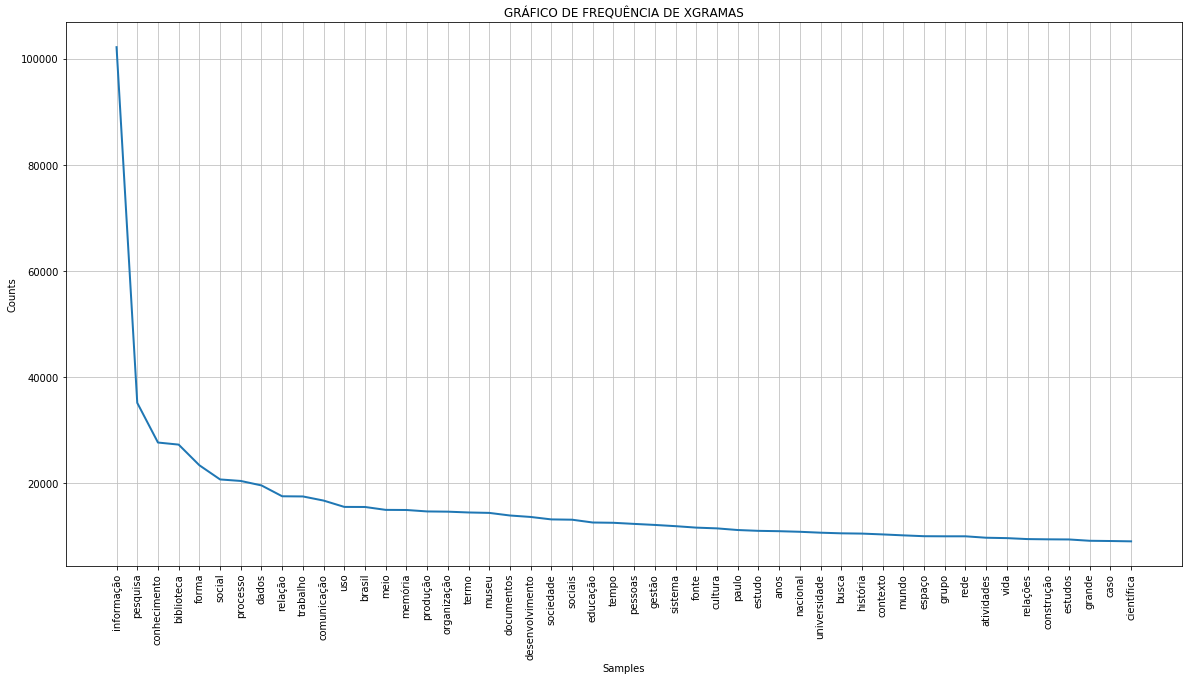

In [15]:
# MOSTRAR O GRÁFICO 

num_freq = 50
#fdist.figure(figsize=(30, 20))
arquivo_grafico = xfrequencia #mudar a variável para representações xgramas v1: total_unigramas v2: total_bigramas v3: total_trigramas v4: xfrequencia
fdist = FreqDist(arquivo_grafico)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) 
fdist.plot(num_freq,cumulative=False,title='GRÁFICO DE FREQUÊNCIA DE XGRAMAS')

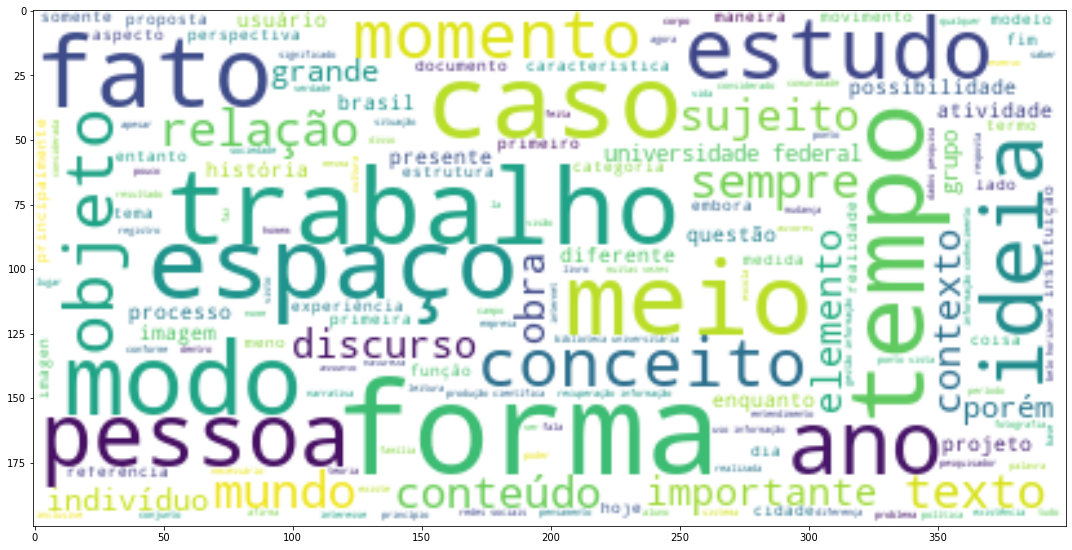

In [16]:
#NUVEM DE PALAVRAS

from wordcloud import WordCloud
cleaned =  ' '.join(xfrequencia)
num_freq = 250
wordcloud = WordCloud(max_font_size=50, max_words=num_freq, background_color="white").generate(cleaned)
fig, ax = plt.subplots(figsize=(15, 20))
ax.imshow(wordcloud, interpolation='nearest')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout()
plt.savefig("tesesdissertacoes_nuv_2015.png", format = "png")

# CRIANDO O DICIONÁRIO E O CORPUS

In [17]:
#CRIAR DICIONÁRIO 
dictionary = corpora.Dictionary(tokenized_data)
 
#TRANSFORMAR A COLEÇÃO TEXTO COM ID
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

## Latent Dirichlet Allocation (LDA)

### Modelo LDA - 10 tópicos

In [18]:
print("=========================================== Modelo LDA: 10 TÓPICOS ==================================================\n")
num_topics = 10

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 10 TÓPICOS ==================================================

Wall time: 34min 6s
Tópico 0:  0.000*"laura" + 0.000*"rodoviário" + 0.000*"museu_rodoviário" + 0.000*"alvim" + 0.000*"graffiti" + 0.000*"laura_alvim" + 0.000*"muf" + 0.000*"dner" + 0.000*"ccla" + 0.000*"fernanda_rodrigues"
Tópico 1:  0.000*"pronaf" + 0.000*"agricultura_familiar" + 0.000*"recurso_informacional" + 0.000*"recuperação_dados" + 0.000*"dados_operacionalização" + 0.000*"operacionalização_pronaf" + 0.000*"visualização_consulta" + 0.000*"quantidade_operações" + 0.000*"anuário_estatístico_rural" + 0.000*"basa"
Tópico 2:  0.001*"knee" + 0.001*"ranking" + 0.001*"universidades" + 0.000*"top" + 0.000*"arthroplasty" + 0.000*"replacement" + 0.000*"classificadas" + 0.000*"rankings" + 0.000*"chamadaexterna=true" + 0.000*"metodo=apresentar"
Tópico 3:  0.000*"coautores" + 0.000*"assinale" + 0.000*"colaboração_científica" + 0.000*"experiência_trabalhos" + 0.000*"umfor_nece

### Modelo LDA - 14 tópicos

In [19]:
print("=========================================== Modelo LDA: 14 TÓPICOS ==================================================\n")
num_topics = 14
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 14 TÓPICOS ==================================================

Wall time: 28min 51s
Tópico 0:  0.000*"ideb" + 0.000*"fomento" + 0.000*"proponente" + 0.000*"editais" + 0.000*"fac" + 0.000*"lattes" + 0.000*"exatas_terra" + 0.000*"letras_artes" + 0.000*"engenharias" + 0.000*"currículo_lattes"
Tópico 1:  0.002*"knee" + 0.001*"termo" + 0.001*"arthroplasty" + 0.001*"replacement" + 0.000*"equivalência" + 0.000*"mesh" + 0.000*"sistemas_organização" + 0.000*"sistemas_organização_conhecimento" + 0.000*"knee_replacement" + 0.000*"termo_relacionado"
Tópico 2:  0.001*"documentos_arquivísticos" + 0.001*"arquivísticos" + 0.001*"arquivísticos_digitais" + 0.001*"documentos_arquivísticos_digitais" + 0.001*"digitais" + 0.001*"rodoviário" + 0.001*"preservação" + 0.001*"museu_rodoviário" + 0.001*"interpares" + 0.000*"preservação_documentos"
Tópico 3:  0.002*"patrimônio" + 0.001*"cultural" + 0.001*"jongo" + 0.001*"samba" + 0.001*"museu" + 0.001*"cidade

### Modelo LDA - 18 tópicos

In [20]:
print("=========================================== Modelo LDA: 18 TÓPICOS ==================================================\n")
num_topics = 18
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 18 TÓPICOS ==================================================

Wall time: 33min 54s
Tópico 0:  0.001*"fotografia_digital" + 0.000*"gonzaga" + 0.000*"edinburgh" + 0.000*"datashare" + 0.000*"edinburgh_datashare" + 0.000*"luiz_gonzaga" + 0.000*"nov._fotografia" + 0.000*"nov._fotografia_digital" + 0.000*"gestão_identidade" + 0.000*"instagram"
Tópico 1:  0.002*"knee" + 0.001*"termo" + 0.001*"arthroplasty" + 0.001*"replacement" + 0.000*"equivalência" + 0.000*"mesh" + 0.000*"sistemas_organização" + 0.000*"sistemas_organização_conhecimento" + 0.000*"knee_replacement" + 0.000*"termo_relacionado"
Tópico 2:  0.000*"material_informacional" + 0.000*"educação_corporativa" + 0.000*"ontouml" + 0.000*"inteligência_organizacional" + 0.000*"grau_aderência" + 0.000*"tutor" + 0.000*"discente" + 0.000*"aderência" + 0.000*"mapa_categorial" + 0.000*"termos/conceitos"
Tópico 3:  0.004*"museu" + 0.003*"museologia" + 0.001*"patrimônio" + 0.001*"cidade" + 0.

### Modelo LDA - 22 tópicos

In [21]:
print("=========================================== Modelo LDA: 22 TÓPICOS ==================================================\n")
num_topics = 22
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 22 TÓPICOS ==================================================

Wall time: 46min 10s
Tópico 0:  0.000*"biblioteca" + 0.000*"museu" + 0.000*"informação" + 0.000*"dados" + 0.000*"pesquisa" + 0.000*"forma" + 0.000*"leitura" + 0.000*"processo" + 0.000*"educação" + 0.000*"trabalho"
Tópico 1:  0.000*"informação" + 0.000*"pesquisa" + 0.000*"biblioteca" + 0.000*"social" + 0.000*"conhecimento" + 0.000*"forma" + 0.000*"relação" + 0.000*"brasil" + 0.000*"sociedade" + 0.000*"trabalho"
Tópico 2:  0.000*"informação" + 0.000*"biblioteca" + 0.000*"forma" + 0.000*"pesquisa" + 0.000*"conhecimento" + 0.000*"memória" + 0.000*"organização" + 0.000*"pessoas" + 0.000*"brasil" + 0.000*"processo"
Tópico 3:  0.002*"sns" + 0.002*"moda" + 0.001*"doc" + 0.001*"doc_doc" + 0.001*"doc_doc_doc" + 0.001*"descritores" + 0.000*"sns_descritores" + 0.000*"sintagmas" + 0.000*"elle" + 0.000*"vogue"
Tópico 4:  0.001*"leukemia" + 0.001*"acute" + 0.001*"myeloid" + 0.001*"wi

### Modelo LDA - 26 tópicos

In [22]:
print("=========================================== Modelo LDA: 26 TÓPICOS ==================================================\n")
num_topics = 26
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 26 TÓPICOS ==================================================

Wall time: 54min 33s
Tópico 0:  0.001*"fae" + 0.001*"fotografia_digital" + 0.001*"documental" + 0.001*"indicador" + 0.000*"fae_brasileira" + 0.000*"physics" + 0.000*"percentual" + 0.000*"quinquênio" + 0.000*"quinquênio_analisado" + 0.000*"fundo"
Tópico 1:  0.000*"informação" + 0.000*"pesquisa" + 0.000*"memória" + 0.000*"livros" + 0.000*"social" + 0.000*"científica" + 0.000*"forma" + 0.000*"termo" + 0.000*"conhecimento" + 0.000*"produção"
Tópico 2:  0.000*"pronaf" + 0.000*"recurso_informacional" + 0.000*"agricultura_familiar" + 0.000*"recuperação_dados" + 0.000*"consultas" + 0.000*"dados_operacionalização" + 0.000*"operacionalização" + 0.000*"operacionalização_pronaf" + 0.000*"rural" + 0.000*"visualização_consulta"
Tópico 3:  0.000*"regulamentação_profissão" + 0.000*"regulamentação" + 0.000*"museólogos" + 0.000*"curso_museu" + 0.000*"profissão_museólogo" + 0.000*"abm" +

### Modelo LDA - 30 tópicos

In [23]:
print("=========================================== Modelo LDA: 30 TÓPICOS ==================================================\n")
num_topics = 30

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 30 TÓPICOS ==================================================

Wall time: 50min 53s
Tópico 0:  0.003*"universidades" + 0.002*"ranking" + 0.001*"top" + 0.001*"usp" + 0.001*"classificadas" + 0.001*"rankings" + 0.001*"posição" + 0.001*"universidades_brasileiras" + 0.001*"brasileiras" + 0.001*"unicamp"
Tópico 1:  0.001*"muf" + 0.001*"graffiti" + 0.001*"favela" + 0.001*"paraty" + 0.001*"fernanda_rodrigues" + 0.001*"casas-tela" + 0.000*"arquivo.mp3" + 0.000*"fernanda" + 0.000*"museu_favela" + 0.000*"entrevistadora_fernanda_rodrigues"
Tópico 2:  0.011*"informação" + 0.004*"pesquisa" + 0.003*"conhecimento" + 0.003*"biblioteca" + 0.002*"forma" + 0.002*"social" + 0.002*"processo" + 0.002*"dados" + 0.002*"relação" + 0.002*"trabalho"
Tópico 3:  0.001*"livros_eletrônicos" + 0.001*"nise" + 0.001*"palavras\" + 0.001*"loucura" + 0.000*"alagoas" + 0.000*"arte_bruta" + 0.000*"bruta" + 0.000*"livro_eletrônico" + 0.000*"imagens_inconsciente" + 0.000*

### Modelo LDA - 34 tópicos

In [24]:
print("=========================================== Modelo LDA: 34 TÓPICOS ==================================================\n")
num_topics = 34

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 34 TÓPICOS ==================================================

Wall time: 1h 2min 59s
Tópico 0:  0.000*"biblioteca" + 0.000*"informação" + 0.000*"pesquisa" + 0.000*"forma" + 0.000*"social" + 0.000*"relação" + 0.000*"conhecimento" + 0.000*"livros" + 0.000*"comunicação" + 0.000*"trabalho"
Tópico 1:  0.005*"informação" + 0.003*"social" + 0.003*"forma" + 0.002*"memória" + 0.002*"museu" + 0.002*"processo" + 0.002*"pesquisa" + 0.002*"trabalho" + 0.002*"biblioteca" + 0.002*"relação"
Tópico 2:  0.000*"informação" + 0.000*"memória" + 0.000*"pesquisa" + 0.000*"forma" + 0.000*"conhecimento" + 0.000*"trabalho" + 0.000*"direito" + 0.000*"produção" + 0.000*"científica" + 0.000*"social"
Tópico 3:  0.002*"dispositivos" + 0.002*"usuários" + 0.002*"dispositivos_comunicação" + 0.002*"web" + 0.002*"web_social" + 0.002*"deficiência" + 0.001*"comunicação_web" + 0.001*"comunicação_web_social" + 0.001*"dispositivos_comunicação_web" + 0.001*"celebridades"

### Modelo LDA - 38 tópicos

In [25]:
print("=========================================== Modelo LDA: 38 TÓPICOS ==================================================\n")
num_topics = 38

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 38 TÓPICOS ==================================================

Wall time: 1h 17min 14s
Tópico 0:  0.015*"informação" + 0.008*"pesquisa" + 0.005*"conhecimento" + 0.005*"dados" + 0.003*"científica" + 0.003*"termo" + 0.003*"produção" + 0.002*"uso" + 0.002*"pesquisadores" + 0.002*"comunicação"
Tópico 1:  0.000*"museu" + 0.000*"informação" + 0.000*"patrimônio" + 0.000*"termo" + 0.000*"forma" + 0.000*"biblioteca" + 0.000*"história" + 0.000*"cultural" + 0.000*"brasil" + 0.000*"pesquisa"
Tópico 2:  0.000*"informação" + 0.000*"pesquisa" + 0.000*"científica" + 0.000*"colaboração" + 0.000*"termo" + 0.000*"trabalho" + 0.000*"coautores" + 0.000*"forma" + 0.000*"grupo" + 0.000*"conhecimento"
Tópico 3:  0.001*"campo_grande" + 0.000*"nscg" + 0.000*"ifhep" + 0.000*"calçadão" + 0.000*"socialista_campo" + 0.000*"socialista_campo_grande" + 0.000*"região_campo_grande" + 0.000*"região_campo" + 0.000*"calçadão_campo" + 0.000*"calçadão_campo_grande"
Tópi

Tópico 36:  0.001*"fotografia_digital" + 0.001*"multiple_document_interface" + 0.001*"multiple_document" + 0.001*"document_interface" + 0.001*"multiple" + 0.001*"document" + 0.000*"instagram" + 0.000*"document_interface_educação" + 0.000*"interface_educação_distância" + 0.000*"interface_educação"
Tópico 37:  0.001*"bachelard" + 0.000*"intimidade" + 0.000*"ninho" + 0.000*"caio" + 0.000*"canto" + 0.000*"lui" + 0.000*"grande_dor" + 0.000*"passagem_grande" + 0.000*"passagem_grande_dor" + 0.000*"mainhard"


### Modelo LDA - 42 tópicos

In [26]:
print("=========================================== Modelo LDA: 42 TÓPICOS ==================================================\n")
num_topics = 42

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))




=========================================== Modelo LDA: 42 TÓPICOS ==================================================

Wall time: 1h 25min 49s
Tópico 0:  0.000*"informação" + 0.000*"dados" + 0.000*"museu" + 0.000*"forma" + 0.000*"pesquisa" + 0.000*"conhecimento" + 0.000*"processo" + 0.000*"brasil" + 0.000*"with" + 0.000*"fonte"
Tópico 1:  0.004*"knee" + 0.002*"arthroplasty" + 0.001*"replacement" + 0.001*"busca" + 0.001*"mesh" + 0.001*"termo" + 0.001*"knee_replacement" + 0.001*"total" + 0.001*"equivalência" + 0.001*"termo_relacionado"
Tópico 2:  0.001*"coautores" + 0.001*"colaboração_científica" + 0.001*"colaboração" + 0.001*"colaboradores" + 0.001*"assinale" + 0.000*"docentes" + 0.000*"coautoria" + 0.000*"experiência_trabalhos" + 0.000*"umfor" + 0.000*"umfor_necessário"
Tópico 3:  0.003*"otlet" + 0.001*"apees" + 0.000*"mediação_cultural" + 0.000*"rayward" + 0.000*"lazzaro" + 0.000*"internacionalismo" + 0.000*"paul_otlet" + 0.000*"associações_internacionais" + 0.000*"gestão_lazzaro" + 0

Tópico 36:  0.001*"edinburgh" + 0.000*"datashare" + 0.000*"edinburgh_datashare" + 0.000*"gerenciamento_dados" + 0.000*"university_edinburgh" + 0.000*"gerenciamento_dados_pesquisa" + 0.000*"metadado" + 0.000*"pesquisa_data" + 0.000*"data_management" + 0.000*"data_library"
Tópico 37:  0.001*"oer" + 0.001*"open" + 0.001*"educational" + 0.001*"resources" + 0.001*"open_educational" + 0.001*"educational_resources" + 0.001*"open_educational_resources" + 0.001*"education" + 0.001*"issn" + 0.000*"learning"
Tópico 38:  0.003*"dispositivos_comunicação" + 0.002*"web_social" + 0.002*"comunicação_web_social" + 0.002*"comunicação_web" + 0.002*"dispositivos_comunicação_web" + 0.001*"scopus" + 0.001*"dispositivos" + 0.001*"periódicos" + 0.001*"web" + 0.001*"journal"
Tópico 39:  0.007*"museu" + 0.006*"memória" + 0.003*"história" + 0.003*"patrimônio" + 0.003*"cultural" + 0.003*"cultura" + 0.002*"arte" + 0.002*"forma" + 0.002*"espaço" + 0.002*"tempo"
Tópico 40:  0.006*"termo" + 0.005*"informação" + 0.005*

## Imprimir o melhor resultado - LDA

In [ ]:
#IMPRESSÃO DO MELHOR RESULTADO
print("=========================================== Modelo LDA: 12 TÓPICOS ==================================================\n")
num_topics = 12 

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

### PyLDAvis

Criando a visulização dos tópicos do modelo LDA.

In [ ]:
#IMPORTAR BIBLIOTECA PARA VISUALIZAÇÃO DOS TÓPICOS LDA
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#VISUALIZAR NO GRÁFICO PYLDAVIS
pyLDAvis.enable_notebook()
%time vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_tesesdissertacoes_2015.html')
vis

## Latent Semantic Indexing (LSI)


### Modelo LSI - 10 tópicos

In [27]:
print("=========================================== Modelo LSI: 10 TÓPICOS ==================================================\n")

NUM_TOPICS = 10
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 10 TÓPICOS ==================================================

Wall time: 9min 41s
Tópico #0:  0.640*"informação" + 0.176*"biblioteca" + 0.172*"pesquisa" + 0.163*"conhecimento" + 0.107*"forma" + 0.105*"processo" + 0.104*"social" + 0.098*"comunicação" + 0.097*"dados" + 0.094*"trabalho"
Tópico #1:  -0.561*"informação" + 0.365*"museu" + 0.206*"biblioteca" + 0.127*"patrimônio" + 0.127*"memória" + 0.107*"cultural" + 0.106*"brasil" + 0.103*"história" + 0.094*"cultura" + 0.093*"nacional"
Tópico #2:  -0.809*"biblioteca" + 0.181*"museu" + -0.120*"usuários" + -0.107*"livros" + -0.106*"leitura" + 0.104*"termo" + 0.100*"documentos" + -0.093*"livro" + -0.086*"dispositivos" + -0.071*"dispositivos_comunicação"
Tópico #3:  -0.445*"documentos" + 0.369*"museu" + -0.230*"documento" + -0.203*"digitais" + -0.198*"arquivísticos" + -0.188*"documentos_arquivísticos" + 0.188*"informação" + -0.184*"digital" + -0.170*"preservação" + -0.146*"arquivísticos_di

### Modelo LSI - 14 tópicos

In [28]:
print("=========================================== Modelo LSI: 14 TÓPICOS ==================================================\n")

NUM_TOPICS = 14
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 14 TÓPICOS ==================================================

Wall time: 10min 8s
Tópico #0:  0.640*"informação" + 0.176*"biblioteca" + 0.172*"pesquisa" + 0.163*"conhecimento" + 0.107*"forma" + 0.105*"processo" + 0.104*"social" + 0.098*"comunicação" + 0.097*"dados" + 0.094*"trabalho"
Tópico #1:  -0.561*"informação" + 0.365*"museu" + 0.206*"biblioteca" + 0.127*"patrimônio" + 0.127*"memória" + 0.107*"cultural" + 0.106*"brasil" + 0.103*"história" + 0.094*"cultura" + 0.093*"nacional"
Tópico #2:  -0.809*"biblioteca" + 0.181*"museu" + -0.120*"usuários" + -0.107*"livros" + -0.106*"leitura" + 0.104*"termo" + 0.100*"documentos" + -0.093*"livro" + -0.086*"dispositivos" + -0.071*"dispositivos_comunicação"
Tópico #3:  -0.445*"documentos" + 0.369*"museu" + -0.230*"documento" + -0.203*"digitais" + -0.198*"arquivísticos" + -0.188*"documentos_arquivísticos" + 0.188*"informação" + -0.184*"digital" + -0.170*"preservação" + -0.146*"arquivísticos_di

### Modelo LSI - 18 tópicos

In [29]:
print("=========================================== Modelo LSI: 18 TÓPICOS ==================================================\n")

NUM_TOPICS = 18
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 18 TÓPICOS ==================================================

Wall time: 11min 32s
Tópico #0:  0.640*"informação" + 0.176*"biblioteca" + 0.172*"pesquisa" + 0.163*"conhecimento" + 0.107*"forma" + 0.105*"processo" + 0.104*"social" + 0.098*"comunicação" + 0.097*"dados" + 0.094*"trabalho"
Tópico #1:  -0.561*"informação" + 0.365*"museu" + 0.206*"biblioteca" + 0.127*"patrimônio" + 0.127*"memória" + 0.107*"cultural" + 0.106*"brasil" + 0.103*"história" + 0.094*"cultura" + 0.093*"nacional"
Tópico #2:  0.809*"biblioteca" + -0.181*"museu" + 0.120*"usuários" + 0.107*"livros" + 0.106*"leitura" + -0.104*"termo" + -0.100*"documentos" + 0.093*"livro" + 0.086*"dispositivos" + 0.071*"dispositivos_comunicação"
Tópico #3:  -0.445*"documentos" + 0.369*"museu" + -0.230*"documento" + -0.203*"digitais" + -0.198*"arquivísticos" + -0.188*"documentos_arquivísticos" + 0.188*"informação" + -0.184*"digital" + -0.170*"preservação" + -0.146*"arquivísticos_digit

### Modelo LSI - 22 tópicos

In [30]:
print("=========================================== Modelo LSI: 22 TÓPICOS ==================================================\n")

NUM_TOPICS = 22
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 22 TÓPICOS ==================================================

Wall time: 12min 36s
Tópico #0:  0.640*"informação" + 0.176*"biblioteca" + 0.172*"pesquisa" + 0.163*"conhecimento" + 0.107*"forma" + 0.105*"processo" + 0.104*"social" + 0.098*"comunicação" + 0.097*"dados" + 0.094*"trabalho"
Tópico #1:  -0.561*"informação" + 0.365*"museu" + 0.206*"biblioteca" + 0.127*"patrimônio" + 0.127*"memória" + 0.107*"cultural" + 0.106*"brasil" + 0.103*"história" + 0.094*"cultura" + 0.093*"nacional"
Tópico #2:  -0.809*"biblioteca" + 0.181*"museu" + -0.120*"usuários" + -0.107*"livros" + -0.106*"leitura" + 0.104*"termo" + 0.100*"documentos" + -0.093*"livro" + -0.086*"dispositivos" + -0.071*"dispositivos_comunicação"
Tópico #3:  -0.445*"documentos" + 0.369*"museu" + -0.230*"documento" + -0.203*"digitais" + -0.198*"arquivísticos" + -0.188*"documentos_arquivísticos" + 0.188*"informação" + -0.184*"digital" + -0.170*"preservação" + -0.146*"arquivísticos_d

### Modelo LSI - 26 tópicos

In [31]:
print("=========================================== Modelo LSI: 26 TÓPICOS ==================================================\n")

NUM_TOPICS = 26
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 26 TÓPICOS ==================================================

Wall time: 14min 24s
Tópico #0:  0.640*"informação" + 0.176*"biblioteca" + 0.172*"pesquisa" + 0.163*"conhecimento" + 0.107*"forma" + 0.105*"processo" + 0.104*"social" + 0.098*"comunicação" + 0.097*"dados" + 0.094*"trabalho"
Tópico #1:  0.561*"informação" + -0.365*"museu" + -0.206*"biblioteca" + -0.127*"patrimônio" + -0.127*"memória" + -0.107*"cultural" + -0.106*"brasil" + -0.103*"história" + -0.094*"cultura" + -0.093*"nacional"
Tópico #2:  0.809*"biblioteca" + -0.181*"museu" + 0.120*"usuários" + 0.107*"livros" + 0.106*"leitura" + -0.104*"termo" + -0.100*"documentos" + 0.093*"livro" + 0.086*"dispositivos" + 0.071*"dispositivos_comunicação"
Tópico #3:  0.445*"documentos" + -0.369*"museu" + 0.230*"documento" + 0.203*"digitais" + 0.198*"arquivísticos" + 0.188*"documentos_arquivísticos" + -0.188*"informação" + 0.184*"digital" + 0.170*"preservação" + 0.146*"arquivísticos_dig

### Modelo LSI - 30 tópicos

In [32]:
print("=========================================== Modelo LSI: 30 TÓPICOS ==================================================\n")

NUM_TOPICS = 30
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 30 TÓPICOS ==================================================

Wall time: 15min 1s
Tópico #0:  0.640*"informação" + 0.176*"biblioteca" + 0.172*"pesquisa" + 0.163*"conhecimento" + 0.107*"forma" + 0.105*"processo" + 0.104*"social" + 0.098*"comunicação" + 0.097*"dados" + 0.094*"trabalho"
Tópico #1:  -0.561*"informação" + 0.365*"museu" + 0.206*"biblioteca" + 0.127*"patrimônio" + 0.127*"memória" + 0.107*"cultural" + 0.106*"brasil" + 0.103*"história" + 0.094*"cultura" + 0.093*"nacional"
Tópico #2:  -0.809*"biblioteca" + 0.181*"museu" + -0.120*"usuários" + -0.107*"livros" + -0.106*"leitura" + 0.104*"termo" + 0.100*"documentos" + -0.093*"livro" + -0.086*"dispositivos" + -0.071*"dispositivos_comunicação"
Tópico #3:  0.445*"documentos" + -0.369*"museu" + 0.230*"documento" + 0.203*"digitais" + 0.198*"arquivísticos" + 0.188*"documentos_arquivísticos" + -0.188*"informação" + 0.184*"digital" + 0.170*"preservação" + 0.146*"arquivísticos_digitais

### Modelo LSI - 34 tópicos

In [33]:
print("=========================================== Modelo LSI: 34 TÓPICOS ==================================================\n")

NUM_TOPICS = 34
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 34 TÓPICOS ==================================================

Wall time: 18min 42s
Tópico #0:  0.640*"informação" + 0.176*"biblioteca" + 0.172*"pesquisa" + 0.163*"conhecimento" + 0.107*"forma" + 0.105*"processo" + 0.104*"social" + 0.098*"comunicação" + 0.097*"dados" + 0.094*"trabalho"
Tópico #1:  -0.561*"informação" + 0.365*"museu" + 0.206*"biblioteca" + 0.127*"patrimônio" + 0.127*"memória" + 0.107*"cultural" + 0.106*"brasil" + 0.103*"história" + 0.094*"cultura" + 0.093*"nacional"
Tópico #2:  0.809*"biblioteca" + -0.181*"museu" + 0.120*"usuários" + 0.107*"livros" + 0.106*"leitura" + -0.104*"termo" + -0.100*"documentos" + 0.093*"livro" + 0.086*"dispositivos" + 0.071*"dispositivos_comunicação"
Tópico #3:  0.445*"documentos" + -0.369*"museu" + 0.230*"documento" + 0.203*"digitais" + 0.198*"arquivísticos" + 0.188*"documentos_arquivísticos" + -0.188*"informação" + 0.184*"digital" + 0.170*"preservação" + 0.146*"arquivísticos_digitais"
T

### Modelo LSI - 38 tópicos

In [34]:
print("=========================================== Modelo LSI: 38 TÓPICOS ==================================================\n")

NUM_TOPICS = 38
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 38 TÓPICOS ==================================================

Wall time: 17min 39s
Tópico #0:  0.640*"informação" + 0.176*"biblioteca" + 0.172*"pesquisa" + 0.163*"conhecimento" + 0.107*"forma" + 0.105*"processo" + 0.104*"social" + 0.098*"comunicação" + 0.097*"dados" + 0.094*"trabalho"
Tópico #1:  0.561*"informação" + -0.365*"museu" + -0.206*"biblioteca" + -0.127*"patrimônio" + -0.127*"memória" + -0.107*"cultural" + -0.106*"brasil" + -0.103*"história" + -0.094*"cultura" + -0.093*"nacional"
Tópico #2:  -0.809*"biblioteca" + 0.181*"museu" + -0.120*"usuários" + -0.107*"livros" + -0.106*"leitura" + 0.104*"termo" + 0.100*"documentos" + -0.093*"livro" + -0.086*"dispositivos" + -0.071*"dispositivos_comunicação"
Tópico #3:  0.445*"documentos" + -0.369*"museu" + 0.230*"documento" + 0.203*"digitais" + 0.198*"arquivísticos" + 0.188*"documentos_arquivísticos" + -0.188*"informação" + 0.184*"digital" + 0.170*"preservação" + 0.146*"arquivísticos

### Modelo LSI - 42 tópicos

In [35]:
print("=========================================== Modelo LSI: 42 TÓPICOS ==================================================\n")

NUM_TOPICS = 42
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 42 TÓPICOS ==================================================

Wall time: 20min 44s
Tópico #0:  0.640*"informação" + 0.176*"biblioteca" + 0.172*"pesquisa" + 0.163*"conhecimento" + 0.107*"forma" + 0.105*"processo" + 0.104*"social" + 0.098*"comunicação" + 0.097*"dados" + 0.094*"trabalho"
Tópico #1:  -0.561*"informação" + 0.365*"museu" + 0.206*"biblioteca" + 0.127*"patrimônio" + 0.127*"memória" + 0.107*"cultural" + 0.106*"brasil" + 0.103*"história" + 0.094*"cultura" + 0.093*"nacional"
Tópico #2:  0.809*"biblioteca" + -0.181*"museu" + 0.120*"usuários" + 0.107*"livros" + 0.106*"leitura" + -0.104*"termo" + -0.100*"documentos" + 0.093*"livro" + 0.086*"dispositivos" + 0.071*"dispositivos_comunicação"
Tópico #3:  -0.445*"documentos" + 0.369*"museu" + -0.230*"documento" + -0.203*"digitais" + -0.198*"arquivísticos" + -0.188*"documentos_arquivísticos" + 0.188*"informação" + -0.184*"digital" + -0.170*"preservação" + -0.146*"arquivísticos_digit

Tópico #40:  -0.179*"jardim" + 0.169*"anos" + 0.140*"imagem" + 0.132*"cultural" + 0.130*"laura" + -0.126*"federal" + 0.118*"dados" + -0.116*"pesquisa" + -0.112*"memória" + 0.108*"serviços"
Tópico #41:  0.216*"dados" + 0.182*"profissional" + -0.143*"grupos" + 0.138*"competências" + 0.137*"gente" + 0.135*"profissionais" + 0.134*"bibliotecário" + -0.125*"alunos" + -0.120*"grupo" + -0.117*"histórias"


## Imprimir o melhor resultado - LSI

In [ ]:
#MELHOR LSI
print("=========================================== Modelo LSI: XX TÓPICOS ==================================================\n")

NUM_TOPICS = 34
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))